## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [405]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [406]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(
    Path("bitstamp.csv"),
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True
)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [407]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [408]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(
    Path("coinbase.csv"),
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True
)

In [409]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [410]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp = bitstamp.dropna()
bitstamp.isnull().sum()


Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [411]:
# Use the str.replace function to remove the dollar sign, $
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].str.replace("$", "")
bitstamp.head()

C:\Users\ACOKE\AppData\Local\Temp/ipykernel_17992/110058528.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].str.replace("$", "")


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.0,1.069665,14582.660932,13632.923329


### Step 3: Convert the data type of the Close column to a `float`.

In [412]:
# Convert the Close data type to a float
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].astype("float")
bitstamp.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [413]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.duplicated().sum()


0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [414]:
# Repeat Steps 1–4 for the coinbase DataFrame
# Removing missing data
coinbase = coinbase.dropna()
coinbase.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

In [415]:
# Removing $ sign from the "Close" Column but no $ signs on the values thus none to remove
coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].str.replace("$", "") 
coinbase.head()

C:\Users\ACOKE\AppData\Local\Temp/ipykernel_17992/151337185.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].str.replace("$", "")


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.26944,13574.719401


In [416]:
# converting string data to float in "Close" column
coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].astype("float")
coinbase.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [417]:
# Identifying duplicate data
coinbase.duplicated().sum()

0

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [418]:
############################################
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = pd.read_csv(
    Path("bitstamp.csv"),
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True
)

bitstamp_sliced = bitstamp.loc[:, "Close"]
# Review the first five rows of the DataFrame
bitstamp_sliced.head()

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [419]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = pd.read_csv(
    Path("coinbase.csv"),
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True
)
coinbase_sliced = coinbase.loc[:, "Close"]
# Review the first five rows of the DataFrame
coinbase_sliced.head()

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [420]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()


count    129067.000000
mean      10459.842453
std        2315.976088
min        5944.000000
25%        8613.370000
50%       10145.950000
75%       11444.810000
max       17234.980000
Name: Close, dtype: float64

In [421]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()


count    129322.000000
mean      10449.140958
std        2317.197419
min        5882.310000
25%        8609.230000
50%       10137.440000
75%       11397.237500
max       17177.990000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Bitstamp Closing Prices'}, xlabel='Timeframe', ylabel='Closing Price'>

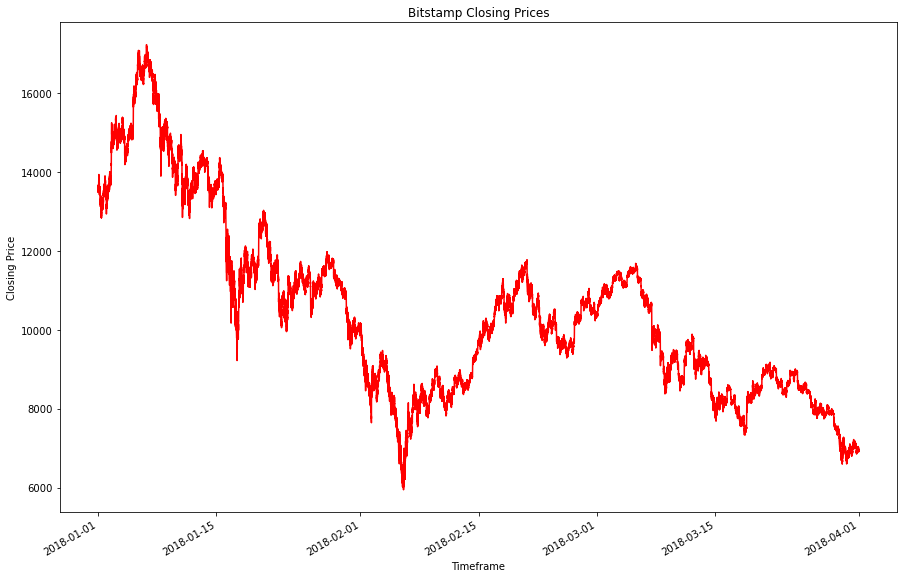

In [422]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced.plot(figsize=(15, 10), title="Bitstamp Closing Prices", color="red", xlabel="Timeframe", ylabel="Closing Price")



<AxesSubplot:title={'center':'Coinbase Closing Prices'}, xlabel='Timeframe', ylabel='Closing Price'>

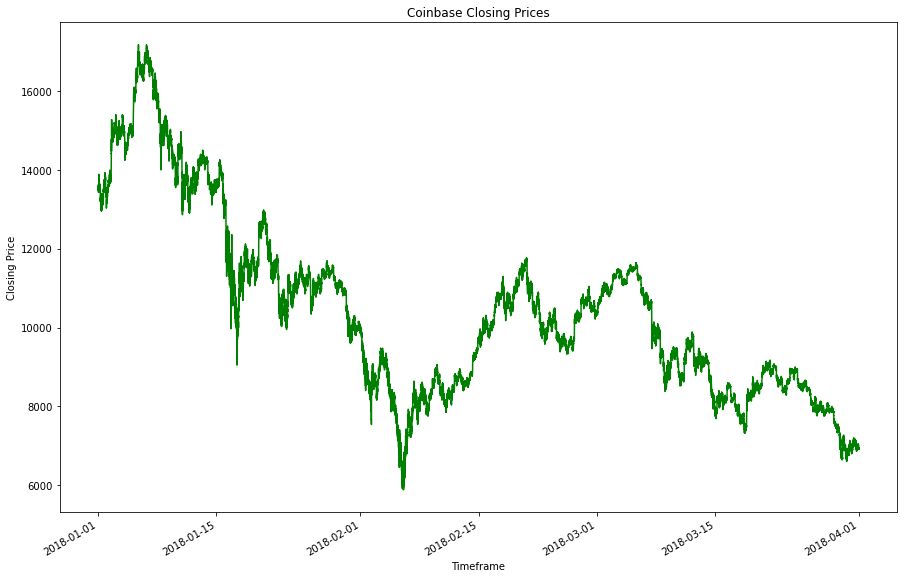

In [423]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced.plot(figsize=(15, 10), color="green", title="Coinbase Closing Prices", xlabel="Timeframe", ylabel="Closing Price")

<AxesSubplot:title={'center':'Bitstamp and Coinbase Pricing'}, xlabel='Timeframe', ylabel='Closing Price'>

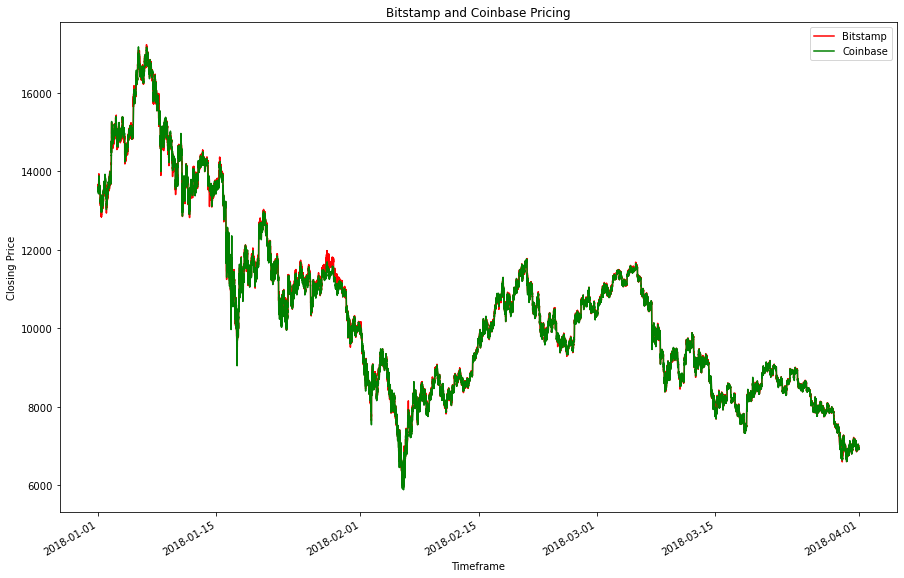

In [424]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced.plot(legend=True, figsize=(15, 10), title="Bitstamp and Coinbase Pricing", color="red", xlabel="Timeframe", ylabel="Closing Price", label="Bitstamp")
coinbase_sliced.plot(legend=True, figsize=(15, 10), color="green", xlabel="Timeframe", ylabel="Closing Price", label="Coinbase")

<AxesSubplot:title={'center':'Bitstamp and Coinbase Pricing'}, xlabel='Timeframe', ylabel='Closing Price'>

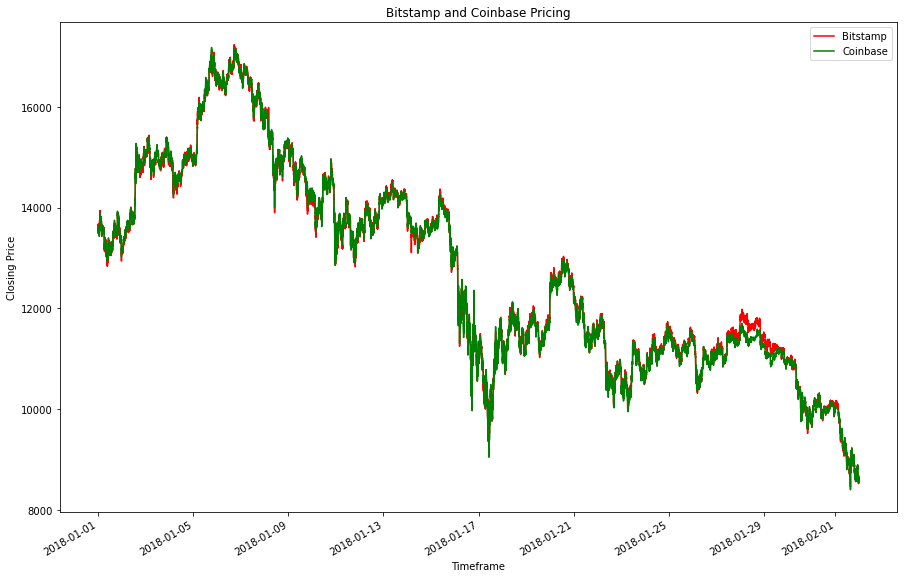

In [425]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced.loc['2018-01-01' : '2018-02-01'].plot(legend=True, figsize=(15, 10), title="Bitstamp and Coinbase Pricing", color="red", xlabel="Timeframe", ylabel="Closing Price", label="Bitstamp")
coinbase_sliced.loc['2018-01-01' : '2018-02-01'].plot(legend=True, figsize=(15, 10), color="green", xlabel="Timeframe", ylabel="Closing Price", label="Coinbase")

<AxesSubplot:title={'center':'Bitstamp and Coinbase Pricing'}, xlabel='Timeframe', ylabel='Closing Price'>

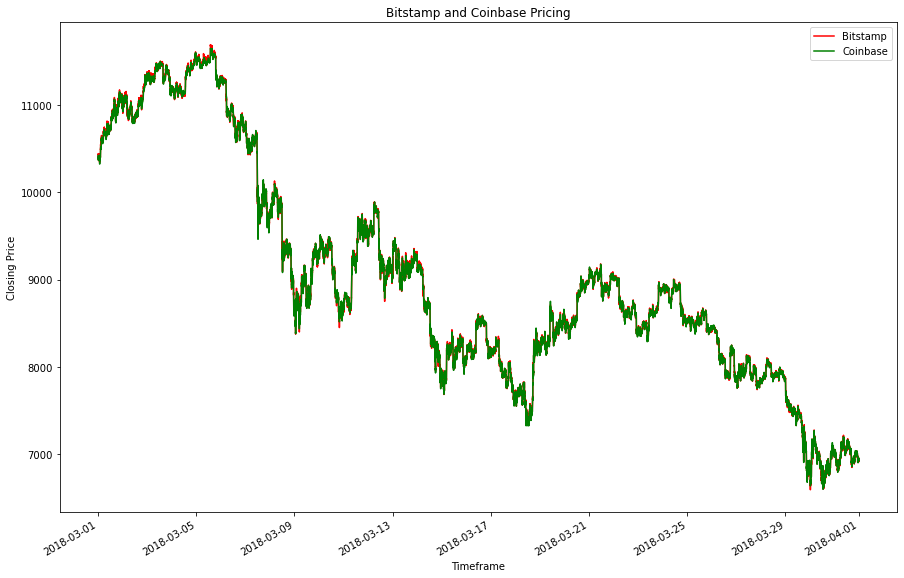

In [426]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp_sliced.loc['2018-03-01' : '2018-04-01'].plot(legend=True, figsize=(15, 10), title="Bitstamp and Coinbase Pricing", color="red", xlabel="Timeframe", ylabel="Closing Price", label="Bitstamp")
coinbase_sliced.loc['2018-03-01' : '2018-04-01'].plot(legend=True, figsize=(15, 10), color="green", xlabel="Timeframe", ylabel="Closing Price", label="Coinbase")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** Looks like the degree of spread has decreased with time. You can see earlier in the months there is more of spread than later in timeframe

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'Bitstamp and Coinbase Pricing'}, xlabel='Timeframe', ylabel='Closing Price'>

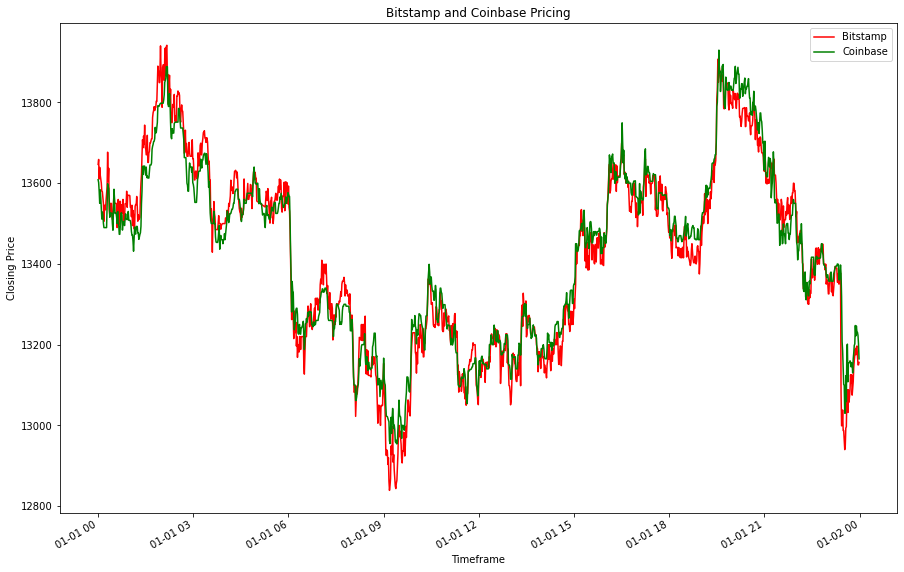

In [427]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc['2018-01-01'].plot(legend=True, figsize=(15, 10), title="Bitstamp and Coinbase Pricing", color="red", xlabel="Timeframe", ylabel="Closing Price", label="Bitstamp")
coinbase_sliced.loc['2018-01-01'].plot(legend=True, figsize=(15, 10), color="green", xlabel="Timeframe", ylabel="Closing Price", label="Coinbase")

In [428]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = coinbase_sliced.loc['2018-01-01'] - bitstamp_sliced.loc['2018-01-01']

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1421.000000
mean        5.767368
std        46.214511
min      -142.000000
25%       -26.890000
50%         5.480000
75%        36.000000
max       319.990000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread on 1/1/2018'}>

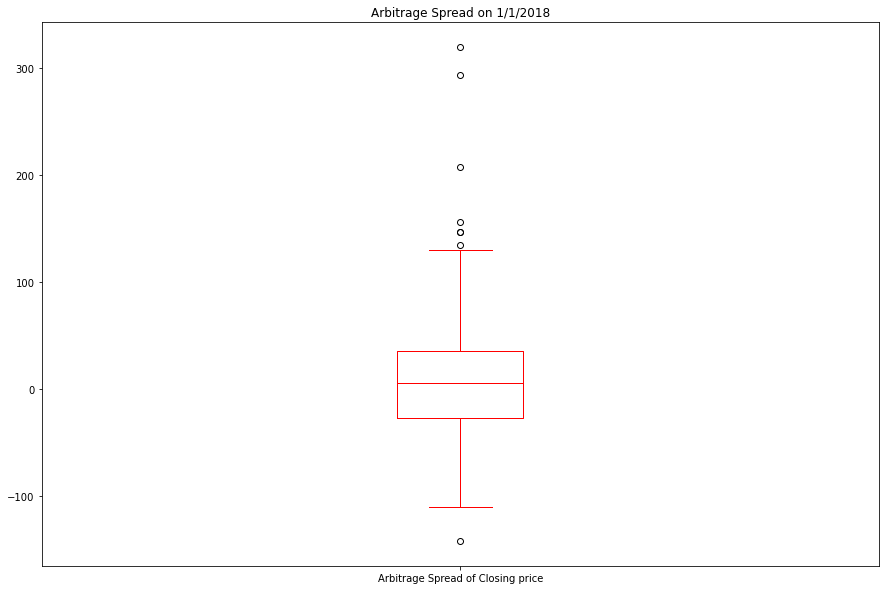

In [429]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind='box', figsize=(15, 10), title="Arbitrage Spread on 1/1/2018", color="red", label="Arbitrage Spread of Closing price")

<AxesSubplot:title={'center':'Bitstamp and Coinbase Pricing'}, xlabel='Timeframe', ylabel='Closing Price'>

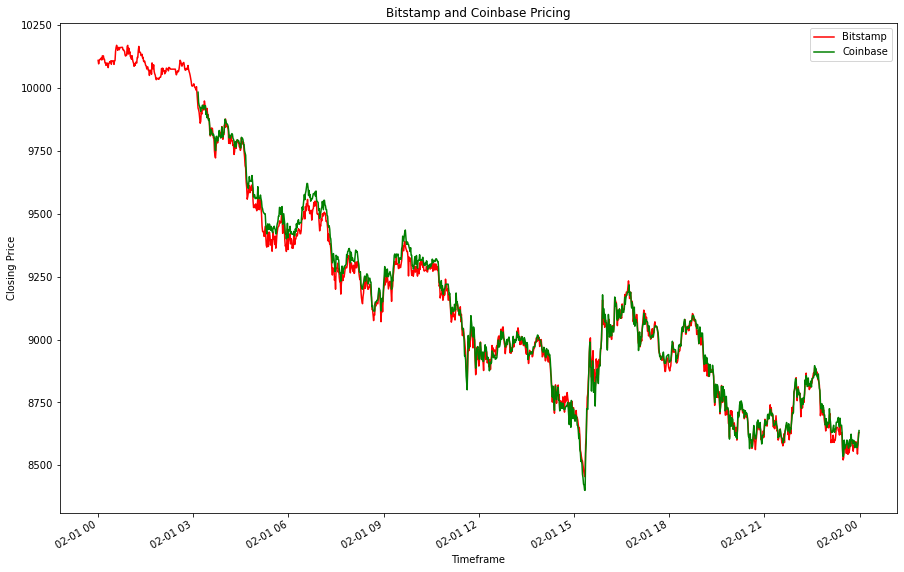

In [430]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc['2018-02-01'].plot(legend=True, figsize=(15, 10), title="Bitstamp and Coinbase Pricing", color="red", xlabel="Timeframe", ylabel="Closing Price", label="Bitstamp")
coinbase_sliced.loc['2018-02-01'].plot(legend=True, figsize=(15, 10), color="green", xlabel="Timeframe", ylabel="Closing Price", label="Coinbase")

In [431]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = coinbase_sliced.loc['2018-02-01'] - bitstamp_sliced.loc['2018-02-01']

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1251.000000
mean       13.956163
std        25.420642
min      -115.930000
25%        -0.960000
50%        13.860000
75%        30.795000
max       125.180000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread on 2/01/2018'}>

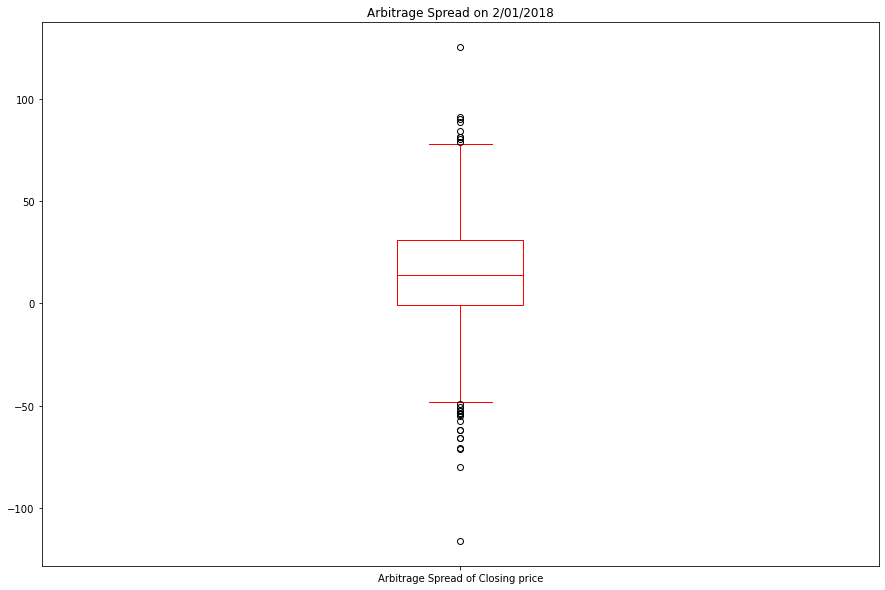

In [432]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind='box', figsize=(15, 10), title="Arbitrage Spread on 2/01/2018", color="red", label="Arbitrage Spread of Closing price")

<AxesSubplot:title={'center':'Bitstamp and Coinbase Pricing'}, xlabel='Timeframe', ylabel='Closing Price'>

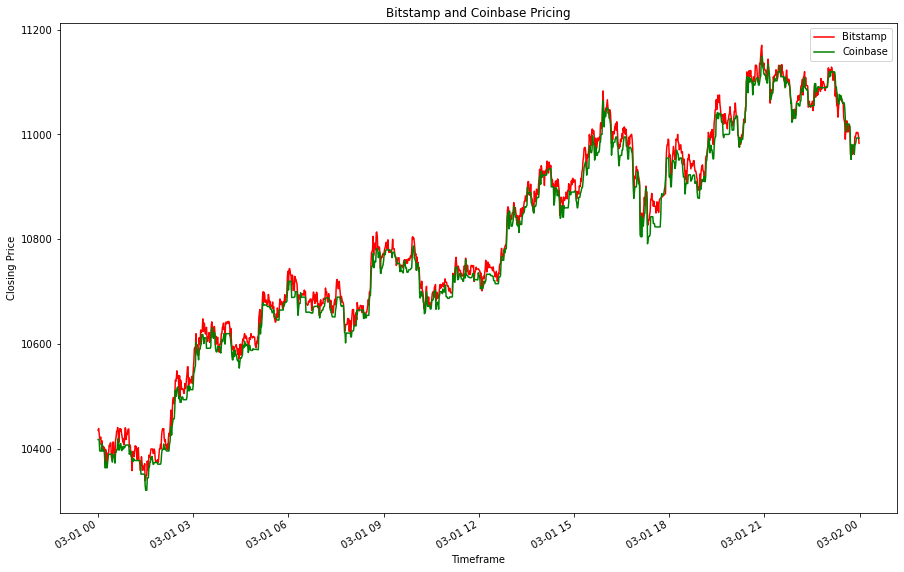

In [433]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc['2018-03-01'].plot(legend=True, figsize=(15, 10), title="Bitstamp and Coinbase Pricing", color="red", xlabel="Timeframe", ylabel="Closing Price", label="Bitstamp")
coinbase_sliced.loc['2018-03-01'].plot(legend=True, figsize=(15, 10), color="green", xlabel="Timeframe", ylabel="Closing Price", label="Coinbase")

In [434]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late =  bitstamp_sliced.loc['2018-03-01'] - coinbase_sliced.loc['2018-03-01']

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1425.00000
mean       14.45527
std        12.52715
min       -41.10000
25%         6.12000
50%        14.48000
75%        22.87000
max        52.86000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread on 3/01/2018'}>

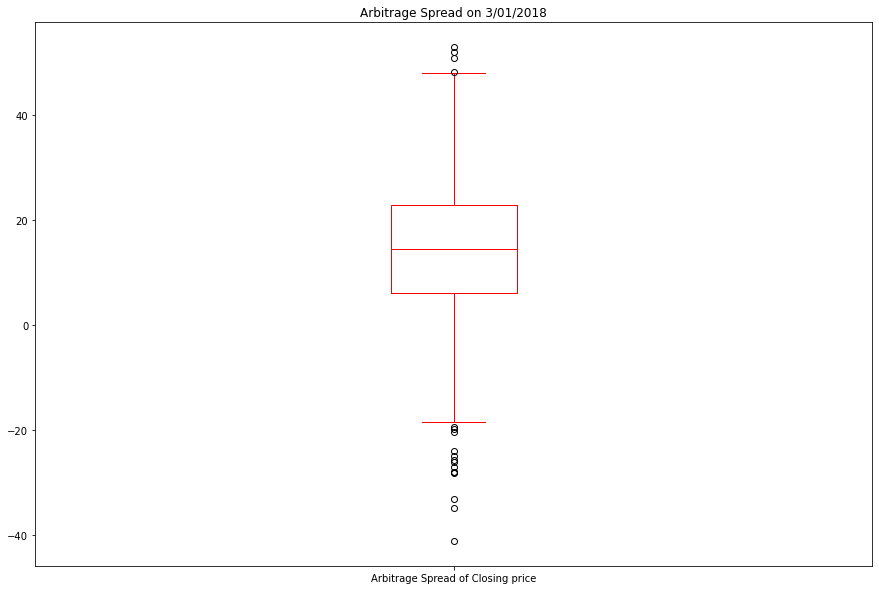

In [435]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind='box', figsize=(15, 10), title="Arbitrage Spread on 3/01/2018", color="red", label="Arbitrage Spread of Closing price")

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [436]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = bitstamp_sliced.loc['2018-01-01'] - coinbase_sliced.loc['2018-01-01']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_early = arbitrage_spread_early[arbitrage_spread_early > 0]

arbitrage_spread_early.describe()

count    636.000000
mean      34.664418
std       24.260997
min        0.010000
25%       14.587500
50%       30.605000
75%       51.685000
max      142.000000
Name: Close, dtype: float64

In [437]:
# For middle date
arbitrage_spread_middle = coinbase_sliced.loc['2018-02-01'] - bitstamp_sliced.loc['2018-02-01']
arbitrage_spread_middle = arbitrage_spread_middle[arbitrage_spread_middle > 0]
arbitrage_spread_middle.describe()

count    911.000000
mean      25.263568
std       17.906485
min        0.040000
25%       10.465000
50%       22.060000
75%       36.220000
max      125.180000
Name: Close, dtype: float64

In [438]:
# For late date
arbitrage_spread_late =  bitstamp_sliced.loc['2018-03-01'] - coinbase_sliced.loc['2018-03-01']
arbitrage_spread_late = arbitrage_spread_late[arbitrage_spread_late > 0]
arbitrage_spread_late.describe()

count    1275.000000
mean       17.016031
std        10.288461
min         0.010000
25%         9.025000
50%        15.770000
75%        24.000000
max        52.860000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [439]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early= arbitrage_spread_early[arbitrage_spread_early > 0] / bitstamp_sliced.loc['2018-01-01']

# Review the spread return DataFrame
spread_return_early.head()

Timestamp
2018-01-01 00:00:00    0.002784
2018-01-01 00:01:00    0.004180
2018-01-01 00:02:00    0.002220
2018-01-01 00:03:00    0.006507
2018-01-01 00:04:00    0.002684
Name: Close, dtype: float64

In [440]:
############
# For middle dataset
spread_return_middle = arbitrage_spread_middle[arbitrage_spread_middle > 0] / bitstamp_sliced.loc['2018-02-01']
spread_return_middle.head()

Timestamp
2018-02-01 00:00:00   NaN
2018-02-01 00:01:00   NaN
2018-02-01 00:02:00   NaN
2018-02-01 00:03:00   NaN
2018-02-01 00:04:00   NaN
Name: Close, dtype: float64

In [441]:
# For late dataset
spread_return_late = arbitrage_spread_late[arbitrage_spread_late > 0] / coinbase_sliced.loc['2018-03-01']
spread_return_late.head()

Timestamp
2018-03-01 00:00:00    0.001690
2018-03-01 00:01:00    0.002020
2018-03-01 00:02:00    0.001153
2018-03-01 00:03:00    0.002260
2018-03-01 00:04:00    0.002296
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [442]:
# For the date early, middle, late in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > 0.01]
profitable_trades_middle = spread_return_middle[spread_return_middle > 0.01]
profitable_trades_late = spread_return_late[spread_return_late > 0.01]

In [443]:
# Review the first five profitable trades
profitable_trades_early.head()

Timestamp
2018-01-01 01:58:00    0.010187
Name: Close, dtype: float64

In [444]:
profitable_trades_middle.head()

Timestamp
2018-02-01 09:47:00    0.013529
Name: Close, dtype: float64

In [445]:
profitable_trades_late.head()

Series([], Name: Close, dtype: float64)

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [446]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe()

count    1.000000
mean     0.010187
std           NaN
min      0.010187
25%      0.010187
50%      0.010187
75%      0.010187
max      0.010187
Name: Close, dtype: float64

In [447]:
profitable_trades_middle.describe()

count    1.000000
mean     0.013529
std           NaN
min      0.013529
25%      0.013529
50%      0.013529
75%      0.013529
max      0.013529
Name: Close, dtype: float64

In [448]:
profitable_trades_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [449]:
# For the date early, middle, late in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
# profit_early = profitable_trades_early * coinbase_sliced.loc['2018-01-01']
profit_early = profitable_trades_early * coinbase_sliced.loc['2018-01-01']
profit_middle = profitable_trades_middle * bitstamp_sliced.loc['2018-02-01']
profit_late = profitable_trades_late * coinbase_sliced.loc['2018-03-01']

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()
profit_per_trade_middle = profit_middle.dropna()
profit_per_trade_late = profit_late.dropna()



In [450]:
# View the early, middle, late profit DataFrame
profit_per_trade_early.head()

Timestamp
2018-01-01 01:58:00    140.553515
Name: Close, dtype: float64

In [451]:
profit_per_trade_middle.head()

Timestamp
2018-02-01 09:47:00    125.18
Name: Close, dtype: float64

In [452]:
profit_per_trade_late.head()

Series([], Name: Close, dtype: float64)

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [453]:
# Generate the summary statistics for the early, middle, late profit per trade DataFrame
profit_per_trade_early.describe()

count      1.000000
mean     140.553515
std             NaN
min      140.553515
25%      140.553515
50%      140.553515
75%      140.553515
max      140.553515
Name: Close, dtype: float64

In [454]:
profit_per_trade_middle.describe()

count      1.00
mean     125.18
std         NaN
min      125.18
25%      125.18
50%      125.18
75%      125.18
max      125.18
Name: Close, dtype: float64

In [455]:
profit_per_trade_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profit Per Trade - Early Date'}, xlabel='Timeframe', ylabel='$ per trade'>

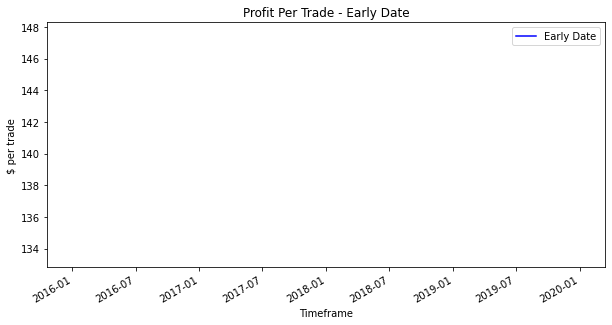

In [456]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot(legend=True, figsize=(10, 5), title="Profit Per Trade - Early Date", color="blue", xlabel="Timeframe", ylabel="$ per trade", label="Early Date")

<AxesSubplot:title={'center':'Profit Per Trade - Middle Date'}, xlabel='Timeframe', ylabel='$ per trade'>

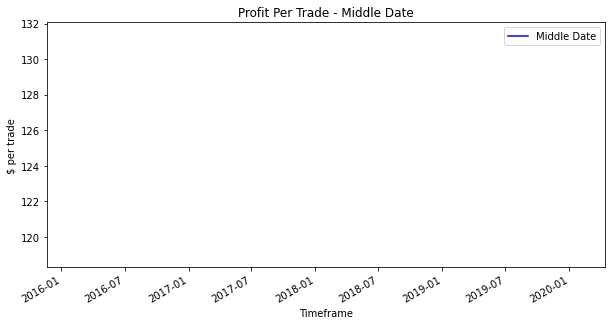

In [457]:
profit_per_trade_middle.plot(legend=True, figsize=(10, 5), title="Profit Per Trade - Middle Date", color="blue", xlabel="Timeframe", ylabel="$ per trade", label="Middle Date")

<AxesSubplot:title={'center':'Profit Per Trade - Late Date'}, xlabel='Timeframe', ylabel='$ per trade'>

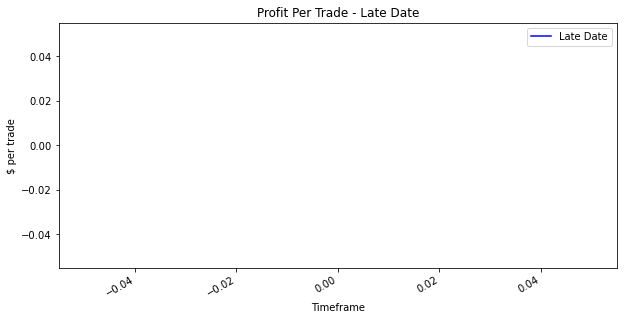

In [458]:
profit_per_trade_late.plot(legend=True, figsize=(10, 5), title="Profit Per Trade - Late Date", color="blue", xlabel="Timeframe", ylabel="$ per trade", label="Late Date")

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [459]:
# Calculate the sum of the potential profits for the early, middle, late profit per trade DataFrame
profit_sum_early = profit_per_trade_early.sum()
profit_sum_early

140.55351506456242

In [460]:
profit_sum_midde = profit_per_trade_middle.sum()
profit_sum_midde

125.18000000000029

In [461]:
profit_sum_late = profit_per_trade_late.sum()
profit_sum_late

0.0

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

<AxesSubplot:title={'center':'Cumulative Bitcoin Profits - Early Date'}, xlabel='Timestamp'>

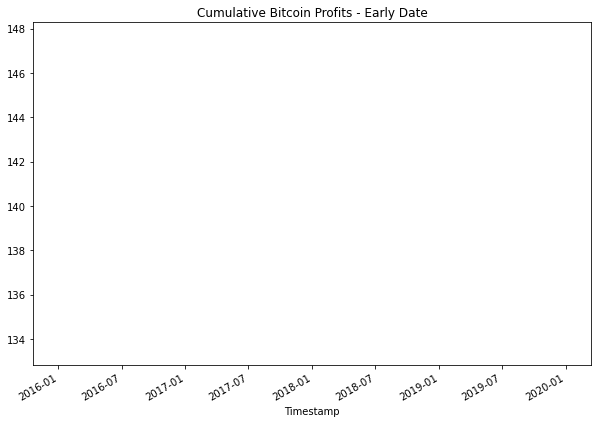

In [462]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early =  profit_per_trade_early.cumsum()

# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(figsize=(10, 7), title="Cumulative Bitcoin Profits - Early Date")

<AxesSubplot:title={'center':'Cumulative Bitcoin Profits - Middle Date'}, xlabel='Timestamp'>

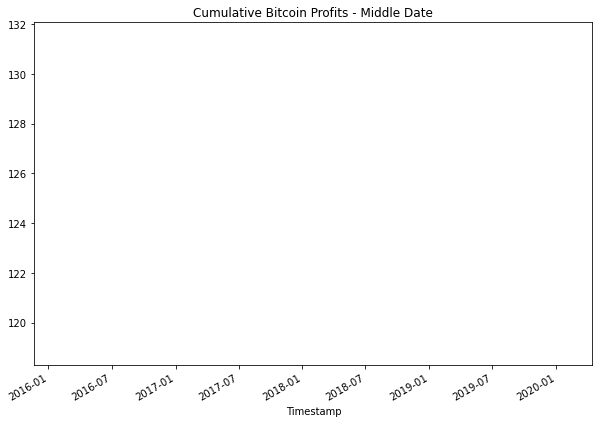

In [463]:
# For Middle Date
cumulative_profit_middle =  profit_per_trade_middle.cumsum()
cumulative_profit_middle.plot(figsize=(10, 7), title="Cumulative Bitcoin Profits - Middle Date")

<AxesSubplot:title={'center':'Cumulative Bitcoin Profits - Late Date'}, xlabel='Timestamp'>

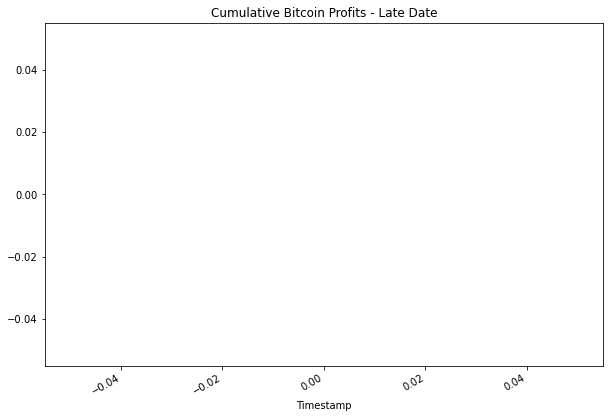

In [464]:
# For late date
cumulative_profit_late =  profit_per_trade_late.cumsum()
cumulative_profit_late.plot(figsize=(10, 7), title="Cumulative Bitcoin Profits - Late Date")

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** Looks like the earlier dates shows a better profit margin and with time the spread or profits decrease. 